In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv(r"C:\Users\Gultac\Desktop\Desktop\cafe_sales.csv",
    sep=";")

In [12]:
df

,transaction_id,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date
0,TXN_1961373,Coffee,2,2,4,Credit Card,Takeaway,08.09.2023
1,TXN_4977031,Cake,4,3,12,Cash,In-store,16.05.2023
2,TXN_4271903,Cookie,4,1,4,Credit Card,In-store,19.07.2023
3,TXN_7034554,Salad,2,5,10,UNKNOWN,UNKNOWN,27.04.2023
4,TXN_3160411,Coffee,2,2,4,Digital Wallet,In-store,11.06.2023
...,...,...,...,...,...,...,...,...
8153,TXN_2739140,Smoothie,4,4,16,UNKNOWN,In-store,05.07.2023
8154,TXN_4766549,Smoothie,2,4,8,Cash,UNKNOWN,20.10.2023
8155,TXN_7672686,Coffee,2,2,4,UNKNOWN,UNKNOWN,30.08.2023
8156,TXN_5255387,Coffee,4,2,8,Digital Wallet,UNKNOWN,02.03.2023


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8158 entries, 0 to 8157
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    8158 non-null   object        
 1   item              8158 non-null   object        
 2   quantity          8158 non-null   int64         
 3   price_per_unit    7193 non-null   float64       
 4   total_spent       7563 non-null   float64       
 5   payment_method    8158 non-null   object        
 6   location          8158 non-null   object        
 7   transaction_date  8158 non-null   datetime64[ns]
 8   year              8158 non-null   int32         
 9   month             8158 non-null   int32         
 10  month_name        8158 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(5)
memory usage: 637.5+ KB


In [14]:
df.describe()

,quantity
count,8158.000000
mean,2.928414
std,1.451187
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [15]:
df['transaction_date'].dtype


dtype('O')

In [16]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], dayfirst=True)

In [17]:
df['transaction_date'].dtype

dtype('<M8[ns]')

In [18]:
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month
df['month_name'] = df['transaction_date'].dt.month_name()

In [19]:
df

,transaction_id,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date,year,month,month_name
0,TXN_1961373,Coffee,2,2,4,Credit Card,Takeaway,2023-09-08,2023,9,September
1,TXN_4977031,Cake,4,3,12,Cash,In-store,2023-05-16,2023,5,May
2,TXN_4271903,Cookie,4,1,4,Credit Card,In-store,2023-07-19,2023,7,July
3,TXN_7034554,Salad,2,5,10,UNKNOWN,UNKNOWN,2023-04-27,2023,4,April
4,TXN_3160411,Coffee,2,2,4,Digital Wallet,In-store,2023-06-11,2023,6,June
...,...,...,...,...,...,...,...,...,...,...,...
8153,TXN_2739140,Smoothie,4,4,16,UNKNOWN,In-store,2023-07-05,2023,7,July
8154,TXN_4766549,Smoothie,2,4,8,Cash,UNKNOWN,2023-10-20,2023,10,October
8155,TXN_7672686,Coffee,2,2,4,UNKNOWN,UNKNOWN,2023-08-30,2023,8,August
8156,TXN_5255387,Coffee,4,2,8,Digital Wallet,UNKNOWN,2023-03-02,2023,3,March


In [48]:
df['total_spent'] = pd.to_numeric(df['total_spent'], errors='coerce')
df['price_per_unit'] = pd.to_numeric(df['price_per_unit'], errors='coerce')

In [49]:
df['total_spent'].sum()

np.float64(67963.0)

In [50]:
df.groupby('item')['quantity'].sum()

item
Cake        3045
Coffee      3162
Cookie      2822
Juice       3081
Salad       3028
Sandwich    2978
Smoothie    2941
Tea         2833
Name: quantity, dtype: int64

In [51]:
df.groupby('item')['quantity'].sum().sort_values(ascending=False)

item
Coffee      3162
Juice       3081
Cake        3045
Salad       3028
Sandwich    2978
Smoothie    2941
Tea         2833
Cookie      2822
Name: quantity, dtype: int64

In [52]:
monthly_sales = df.groupby(['year','month'])['total_spent'].sum()
monthly_sales

year  month
2023  1        5824.0
      2        5267.0
      3        5732.0
      4        5730.0
      5        5483.0
      6        5905.0
      7        5557.0
      8        5638.0
      9        5497.0
      10       5864.0
      11       5848.0
      12       5618.0
Name: total_spent, dtype: float64

In [53]:
df.groupby('item')['total_spent'].sum()

item
Cake         9135.0
Coffee       6324.0
Cookie       2822.0
Juice        9243.0
Salad       15140.0
Sandwich    11912.0
Smoothie    11764.0
Tea          1623.0
Name: total_spent, dtype: float64

In [54]:
df['total_spent'].mean()

np.float64(8.9862488430517)

In [55]:
df.groupby('item')['total_spent'].mean().sort_values(ascending=False)

item
Salad       14.628019
Smoothie    11.882828
Sandwich    11.598832
Cake         8.860330
Juice        8.678873
Coffee       5.915809
Tea          4.386486
Cookie       2.891393
Name: total_spent, dtype: float64

In [56]:
df['payment_method'].value_counts()

payment_method
UNKNOWN           2584
Digital Wallet    1877
Cash              1853
Credit Card       1844
Name: count, dtype: int64

In [57]:
df.groupby('payment_method')['total_spent'].sum().sort_values(ascending=False)

payment_method
UNKNOWN           21167.0
Cash              15758.0
Digital Wallet    15573.0
Credit Card       15465.0
Name: total_spent, dtype: float64

In [58]:
df.groupby('location')['total_spent'].sum()

location
In-store    20871.0
Takeaway    20039.0
UNKNOWN     27053.0
Name: total_spent, dtype: float64

In [59]:
df.groupby('location')['quantity'].sum()

location
In-store    7229
Takeaway    7168
UNKNOWN     9493
Name: quantity, dtype: int64

In [23]:
#Although Takeaway and In-store channels generate a similar sales volume, In-store purchases result in a higher average spending per transaction.
#Customers show a stronger preference for digital payment methods, and those using Digital Wallets tend to spend more per transaction.
#Healthy and everyday products such as salads and juices have higher overall sales turnover.

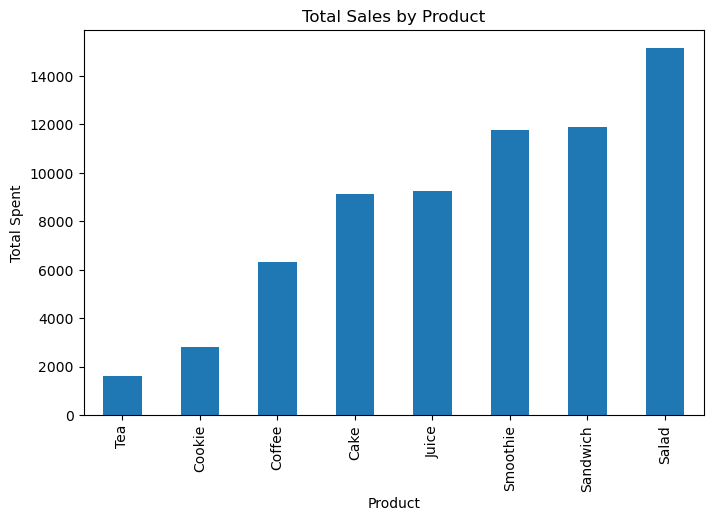

In [60]:
plt.figure(figsize=(8,5))
df.groupby('item')['total_spent'].sum().sort_values().plot(kind='bar')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Spent')
plt.show()

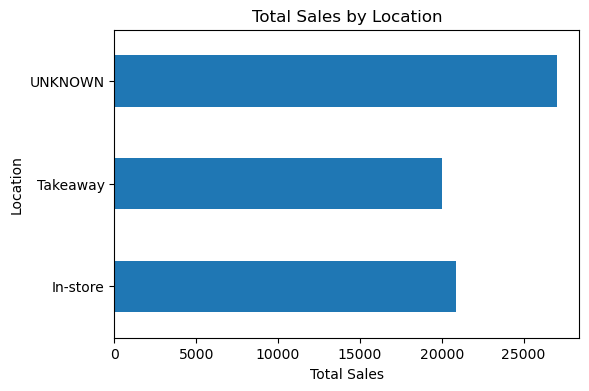

In [61]:
location_sales = df.groupby('location')['total_spent'].sum()
plt.figure(figsize=(6,4))
location_sales.plot(kind='barh')
plt.title('Total Sales by Location')
plt.xlabel('Total Sales')
plt.ylabel('Location')
plt.xticks(rotation=0)
plt.show()

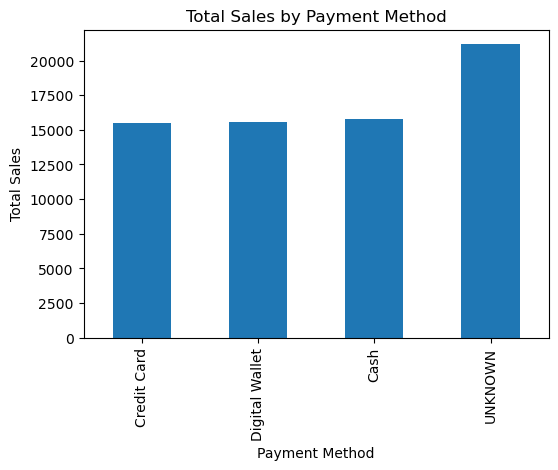

In [62]:
payment_sales = df.groupby('payment_method')['total_spent'].sum().sort_values()
plt.figure(figsize=(6,4))
payment_sales.plot(kind='bar')
plt.title('Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.show()

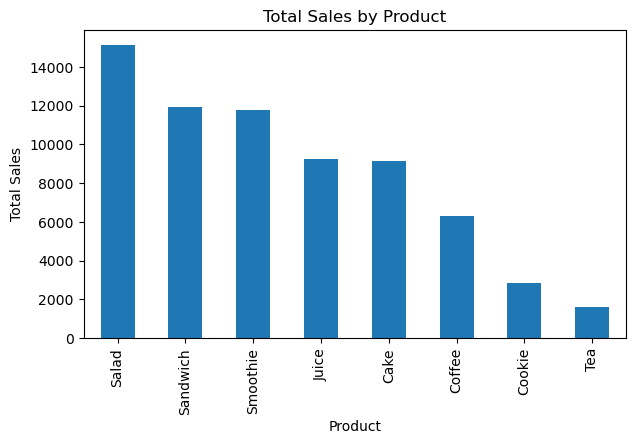

In [63]:
item_sales = df.groupby('item')['total_spent'].sum().sort_values(ascending=False)
plt.figure(figsize=(7,4))
item_sales.plot(kind='bar')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

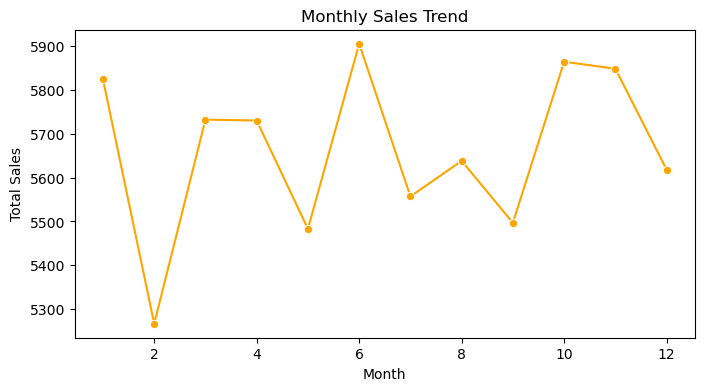

In [64]:
monthly_sales = df.groupby(['year','month'])['total_spent'].sum().reset_index()
plt.figure(figsize=(8,4))
sns.lineplot(data=monthly_sales, x='month', y='total_spent', marker='o',color='orange')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

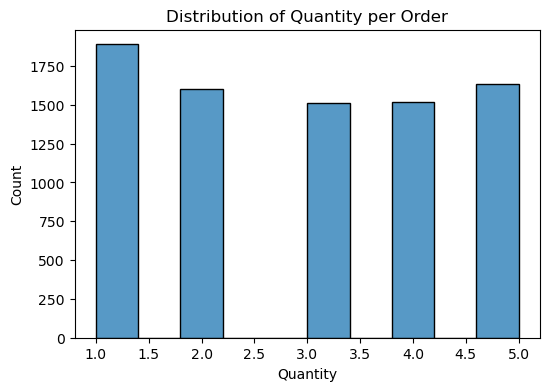

In [65]:
plt.figure(figsize=(6,4))
sns.histplot(df['quantity'], bins=10)
plt.title('Distribution of Quantity per Order')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

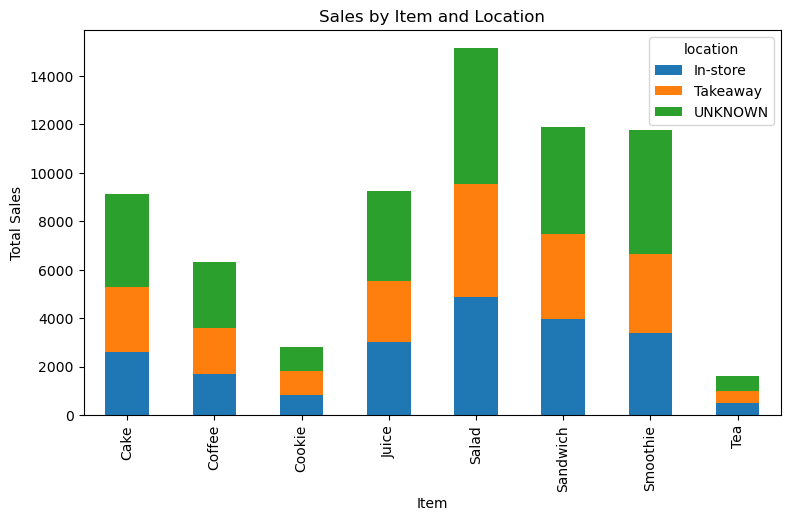

In [66]:
item_location = df.groupby(['item','location'])['total_spent'].sum().unstack()
item_location.plot(
    kind='bar',
    stacked=True,
    figsize=(9,5)
)
plt.title('Sales by Item and Location')
plt.xlabel('Item')
plt.ylabel('Total Sales')
plt.show()